In [1]:
include("./modules/parma_wrapper.jl")
using .Parma

In [2]:

ip = 0            # Particle ID (Particle ID, 0:neutron, 1-28:H-Ni, 29-30:muon+-, 31:e-, 32:e+, 33:photon)
e = 100.0        # Energy (MeV/n)
iyear = 2019      # Year
imonth = 2        # Month
iday = 1          # Day
glat = 30.5    # Latitude (deg), -90 =< glat =< 90
glong = -76.2  # Longitude (deg), -180 =< glong =< 180
alti = 0.0     # Altitude (km)
g = 0.15       # Local geometry parameter, 0=< g =< 1: water weight fraction, 10:no-earth, 100:blackhole, -10< g < 0: pilot, g < -10: cabin
ang = -0.5     # cosine of zenith angle (e.g. ang=1.0 for vertical direction, ang=0.0 for holizontal direction)

# calculate parameters
s = getHP(iyear, imonth, iday)  # W-index (solar activity)
r = getr(glat, glong)           # Vertical cut-off rigidity (GV)
d = getd(alti, glat)            # Atmospheric depth (g/cm2), set glat = 100 for use US Standard Atmosphere 1976.

Flux, DifFlux = 0.0, 0.0

Flux = getSpec(ip, s, r, d, e, g)
println("Angular Integrated Flux(/cm2/s/(MeV/n))= ", Flux)


Angular Integrated Flux(/cm2/s/(MeV/n))= 1.4431676218428849e-5


In [3]:
x=-3:0.2:3
y=-2:0.2:2
z=@. exp(-(x^2+y'^2))  

31×21 Matrix{Float64}:
 2.26033e-6   4.83321e-6   9.54016e-6   …  4.83321e-6   2.26033e-6
 7.2103e-6    1.54176e-5   3.04325e-5      1.54176e-5   7.2103e-6
 2.1232e-5    4.53999e-5   8.96139e-5      4.53999e-5   2.1232e-5
 5.77146e-5   0.00012341   0.000243596     0.00012341   5.77146e-5
 0.000144823  0.000309671  0.000611253     0.000309671  0.000144823
 0.000335463  0.000717312  0.00141589   …  0.000717312  0.000335463
 0.000717312  0.00153381   0.00302755      0.00153381   0.000717312
 0.00141589   0.00302755   0.00597602      0.00302755   0.00141589
 0.00257991   0.00551656   0.010889        0.00551656   0.00257991
 0.00433948   0.00927901   0.0183156       0.00927901   0.00433948
 0.00673795   0.0144076    0.0284388    …  0.0144076    0.00673795
 0.0096577    0.0206508    0.0407622       0.0206508    0.0096577
 0.0127784    0.0273237    0.0539337       0.0273237    0.0127784
 ⋮                                      ⋱               ⋮
 0.0096577    0.0206508    0.0407622       0.0206

In [14]:
x=-1:0.1:1
y=3:0.2:5
z = @. exp(-x^2 - y'^2)

21×11 Matrix{Float64}:
 4.53999e-5   1.3138e-5   3.50963e-6  8.65464e-7  …  3.62711e-11  5.10909e-12
 5.48998e-5   1.58871e-5  4.24402e-6  1.04656e-6     4.38608e-11  6.17816e-12
 6.50731e-5   1.88311e-5  5.03046e-6  1.2405e-6      5.19884e-11  7.32301e-12
 7.56041e-5   2.18786e-5  5.84456e-6  1.44125e-6     6.04019e-11  8.50812e-12
 8.61001e-5   2.4916e-5   6.65595e-6  1.64134e-6     6.87874e-11  9.68929e-12
 9.61117e-5   2.78132e-5  7.42989e-6  1.83219e-6  …  7.67859e-11  1.08159e-11
 0.000105163  3.04325e-5  8.12959e-6  2.00473e-6     8.40172e-11  1.18345e-11
 0.000112788  3.26391e-5  8.71905e-6  2.15009e-6     9.01091e-11  1.26926e-11
 0.000118571  3.43125e-5  9.16609e-6  2.26033e-6     9.47291e-11  1.33434e-11
 0.000122182  3.53575e-5  9.44524e-6  2.32917e-6     9.7614e-11   1.37498e-11
 0.00012341   3.57128e-5  9.54016e-6  2.35258e-6  …  9.85951e-11  1.38879e-11
 0.000122182  3.53575e-5  9.44524e-6  2.32917e-6     9.7614e-11   1.37498e-11
 0.000118571  3.43125e-5  9.16609e-6  2.2

In [27]:
glat=-3:0.2:30
glong=-3:0.2:50
f(lat, long) = @. getSpec(ip, s, getr(lat, long'), d, e, g)
z=f(glat, glong)

166×266 Matrix{Float64}:
 7.44486e-6  7.44486e-6  7.44486e-6  …  6.6941e-6   6.6941e-6   6.6941e-6
 7.43181e-6  7.43181e-6  7.43181e-6     6.68262e-6  6.68119e-6  6.67975e-6
 7.41875e-6  7.41875e-6  7.41875e-6     6.67113e-6  6.66825e-6  6.66537e-6
 7.40567e-6  7.40567e-6  7.40567e-6     6.65961e-6  6.65529e-6  6.65097e-6
 7.39257e-6  7.39257e-6  7.39257e-6     6.64808e-6  6.64231e-6  6.63654e-6
 7.37945e-6  7.37945e-6  7.37945e-6  …  6.63654e-6  6.62932e-6  6.62209e-6
 7.37289e-6  7.37158e-6  7.37026e-6     6.62643e-6  6.62064e-6  6.61486e-6
 7.36632e-6  7.36369e-6  7.36106e-6     6.6163e-6   6.61196e-6  6.60761e-6
 7.35975e-6  7.3558e-6   7.35186e-6     6.60617e-6  6.60327e-6  6.60037e-6
 7.35317e-6  7.34791e-6  7.34264e-6     6.59602e-6  6.59457e-6  6.59312e-6
 7.34659e-6  7.34e-6     7.33341e-6  …  6.58586e-6  6.58586e-6  6.58586e-6
 7.33341e-6  7.32814e-6  7.32285e-6     6.57423e-6  6.57278e-6  6.57132e-6
 7.32021e-6  7.31625e-6  7.31229e-6     6.56259e-6  6.55968e-6  6.55677e-6
 

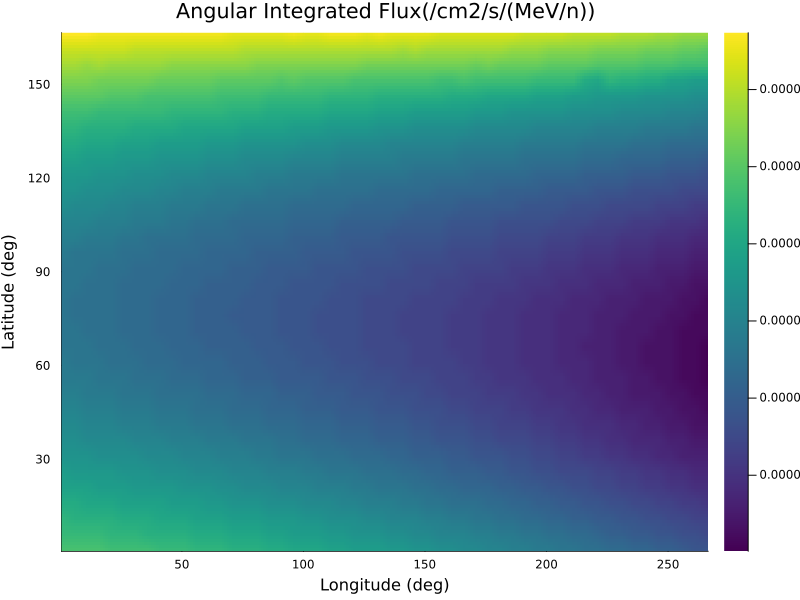

In [32]:
using Plots
p = heatmap(z, 
    title="Angular Integrated Flux(/cm2/s/(MeV/n))", 
    xlabel="Longitude (deg)", ylabel="Latitude (deg)", 
    color=:viridis,  
    size=(800, 600))
plot(p, fmt=:svg)